In [1]:
%matplotlib inline
path = "data/state-farm/"
#path = "data/state-farm/sample/"
import utils; reload(utils)
from utils import *

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
batch_size=64

In [29]:
%mkdir data/state-farm/sample/results

# Create Validation Set and Sample

In [4]:
%mkdir data/state-farm/sample
%mkdir data/state-farm/sample/train
%mkdir data/state-farm/sample/valid

In [5]:
%mkdir data/state-farm/valid

In [6]:
%cd data/state-farm/train

/home/ubuntu/deep/nbs/data/state-farm/train


In [8]:
%mkdir ../valid/c0
%mkdir ../valid/c1
%mkdir ../valid/c2
%mkdir ../valid/c3
%mkdir ../valid/c4
%mkdir ../valid/c5
%mkdir ../valid/c6
%mkdir ../valid/c7
%mkdir ../valid/c8
%mkdir ../valid/c9

mkdir: cannot create directory ‘../valid/c0’: File exists
mkdir: cannot create directory ‘../valid/c1’: File exists
mkdir: cannot create directory ‘../valid/c2’: File exists


In [9]:
g = glob('./*/*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], '../valid/' + shuf[i])

In [10]:
from shutil import copyfile

In [11]:
%mkdir ../sample/valid/c0
%mkdir ../sample/valid/c1
%mkdir ../sample/valid/c2
%mkdir ../sample/valid/c3
%mkdir ../sample/valid/c4
%mkdir ../sample/valid/c5
%mkdir ../sample/valid/c6
%mkdir ../sample/valid/c7
%mkdir ../sample/valid/c8
%mkdir ../sample/valid/c9
%mkdir ../sample/train/c0
%mkdir ../sample/train/c1
%mkdir ../sample/train/c2
%mkdir ../sample/train/c3
%mkdir ../sample/train/c4
%mkdir ../sample/train/c5
%mkdir ../sample/train/c6
%mkdir ../sample/train/c7
%mkdir ../sample/train/c8
%mkdir ../sample/train/c9

In [12]:
%pwd

u'/home/ubuntu/deep/nbs/data/state-farm/train'

In [13]:
g = glob('./*/*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], '../sample/train/' + shuf[i])

In [14]:
%cd ../valid

/home/ubuntu/deep/nbs/data/state-farm/valid


In [15]:
%ls

c0/  c1/  c2/  c3/  c4/  c5/  c6/  c7/  c8/  c9/


In [16]:
g = glob('./*/*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], '../sample/valid/' + shuf[i])

## Move to separate dirs for each set

DONE

In [3]:
from vgg16 import Vgg16

In [4]:
vgg = Vgg16()

In [5]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [6]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)

Found 20424 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [99]:
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/ft1.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/ft2.h5')
vgg.model.optimizer.lr = 0.01
vgg.fit(batches, val_batches, nb_epoch=3)
vgg.model.save_weights(path+'results/ft5.h5')

Epoch 1/1
20424/20424 [==============================] - 555s - loss: 14.2819 - acc: 0.1120 - val_loss: 14.4418 - val_acc: 0.1040
Epoch 1/1
20424/20424 [==============================] - 555s - loss: 14.3156 - acc: 0.1118 - val_loss: 14.4982 - val_acc: 0.1005
Epoch 1/3
20424/20424 [==============================] - 556s - loss: 14.3235 - acc: 0.1113 - val_loss: 14.4821 - val_acc: 0.1015
Epoch 2/3
20424/20424 [==============================] - 555s - loss: 14.3156 - acc: 0.1118 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/3
20424/20424 [==============================] - 554s - loss: 14.3243 - acc: 0.1113 - val_loss: 14.5224 - val_acc: 0.0990


## Predict and submit

In [8]:
vgg.model.load_weights(path+'results/ft5.h5')

In [9]:
val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)

Found 2000 images belonging to 10 classes.


In [10]:
probs

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [89]:
labels = val_batches.classes
filenames = val_batches.filenames

In [86]:
probs = probs[:,0]
preds = np.round(1-probs)
probs[:8]

IndexError: too many indices for array

In [69]:
# Number of images to view for each visualization task
n_view = 4

In [70]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

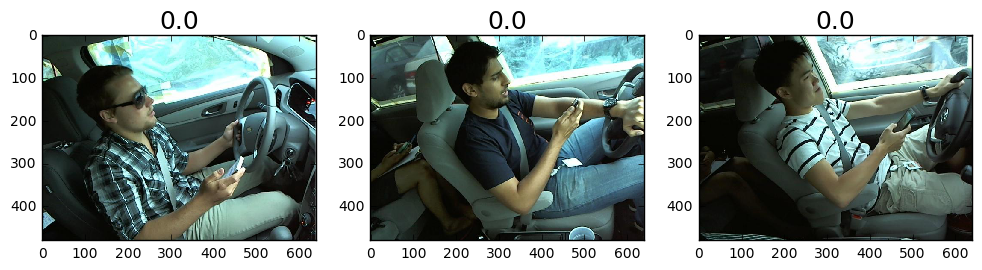

In [74]:
#1. A few correct labels at random
correct = np.where(preds==labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

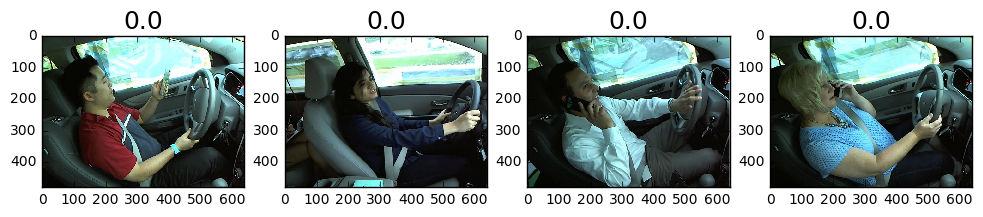

In [76]:
#2. A few incorrect labels at random
incorrect = np.where(preds!=labels)[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

[[0 4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]]


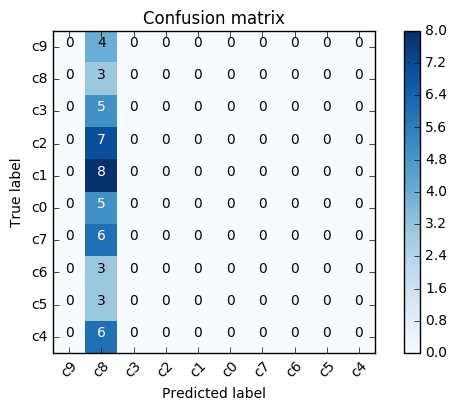

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, preds)
plot_confusion_matrix(cm, val_batches.class_indices)